<a href="https://colab.research.google.com/github/yukta2106/ML-ANN-Experiments/blob/main/ANN_Unit4_Assignment_Q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# --- 1. Data Loading and Preparation ---
print("--- 1. Data Loading and Preparation ---")
file_path = 'vehicle.csv' # File is assumed to be in the current working directory (Colab's session storage)

try:
    df = pd.read_csv(file_path)
    print(f"File '{file_path}' loaded successfully. DataFrame shape: {df.shape}")
except FileNotFoundError:
    print(f"FATAL ERROR: The file '{file_path}' was not found. Please ensure it was uploaded correctly.")
    raise

# Separate Features (X) and Target (y - last column assumed)
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Standardization (Crucial for PCA)
scaler = StandardScaler()
# 🌟 This is the dataset for the "without PCA" scenario.
X_original_standardized = scaler.fit_transform(X)

print(f"Original Feature Shape: {X.shape}")
print(f"Standardized Data Shape: {X_original_standardized.shape}")
print("-----------------------------------------------------")


# --- 2. PCA Implementation and Dimensionality Analysis ---
print("\n--- 2. PCA Analysis ---")

# Apply PCA with all components to analyze variance
pca_full = PCA(n_components=None)
pca_full.fit(X_original_standardized)

# Calculate the cumulative explained variance ratio
cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)

# Determine the optimal number of components (k) for 95% variance retention
threshold = 0.95
k = np.argmax(cumulative_variance >= threshold) + 1

print(f"Total original features: {X_original_standardized.shape[1]}")
print(f"Optimal number of PCs (k) to retain {threshold*100}% variance: {k}")


# --- 3. Visualization (Scree Plot) ---
plt.figure(figsize=(9, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-', color='b', label='Cumulative Variance')
plt.axvline(x=k, color='r', linestyle='--', label=f'{k} components ({threshold*100}%)')
plt.title('Scree Plot: Cumulative Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.legend()
plt.show()
#

print("-----------------------------------------------------")

# --- 4. Final Feature Set Creation ---
# Apply PCA again, this time with the reduced 'k' components
pca_reduced = PCA(n_components=k)
# 🌟 This is the dataset for the "after applying PCA" scenario.
X_pca_reduced = pca_reduced.fit_transform(X_original_standardized)

print("--- Final Feature Sets for ANN Comparison ---")
# 1. Dataset using all original features
print(f"1. X_original_standardized shape (All Features): {X_original_standardized.shape}")

# 2. Dataset after applying PCA
print(f"2. X_pca_reduced shape (Reduced Features): {X_pca_reduced.shape}")

--- 1. Data Loading and Preparation ---
File 'vehicle.csv' loaded successfully. DataFrame shape: (846, 19)
Original Feature Shape: (846, 18)
Standardized Data Shape: (846, 18)
-----------------------------------------------------

--- 2. PCA Analysis ---


ValueError: Input X contains NaN.
PCA does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

--- 1. Data Loading and Preparation ---
File 'vehicle.csv' loaded successfully. DataFrame shape: (846, 19)
Features imputed. NaN values are now filled.
Original Feature Shape: (846, 18)
Standardized Data Shape: (846, 18)
-----------------------------------------------------

--- 3. PCA Analysis ---
Total original features: 18
Optimal number of PCs (k) to retain 95.0% variance: 7


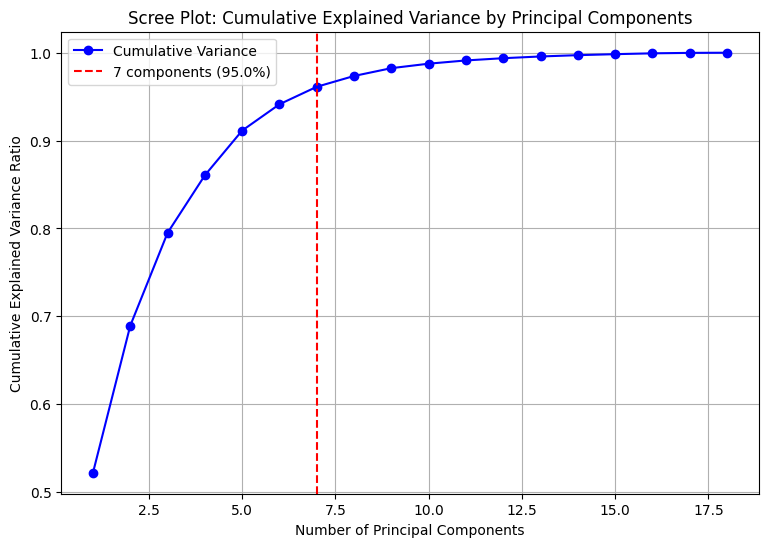

-----------------------------------------------------
--- Final Feature Sets for ANN Comparison ---
1. X_original_standardized shape (All Features): (846, 18)
2. X_pca_reduced shape (Reduced Features): (846, 7)


In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer # New Import for Imputation
import matplotlib.pyplot as plt

# --- 1. Data Loading and Preparation ---
print("--- 1. Data Loading and Preparation ---")
file_path = 'vehicle.csv'

try:
    df = pd.read_csv(file_path)
    print(f"File '{file_path}' loaded successfully. DataFrame shape: {df.shape}")
except FileNotFoundError:
    print(f"FATAL ERROR: The file '{file_path}' was not found.")
    raise

# Separate Features (X) and Target (y - last column assumed)
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# --- 2. Data Cleaning: Handling NaN Values (The Fix) ---
# We use SimpleImputer to fill missing values (NaN) with the mean of the column.
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X_imputed = imputer.fit_transform(X)
# X_imputed is now a NumPy array with no NaNs.

print(f"Features imputed. NaN values are now filled.")

# Standardization (Crucial for PCA)
scaler = StandardScaler()
# 🌟 This is the dataset for the "without PCA" scenario (now clean and scaled).
X_original_standardized = scaler.fit_transform(X_imputed)

print(f"Original Feature Shape: {X.shape}")
print(f"Standardized Data Shape: {X_original_standardized.shape}")
print("-----------------------------------------------------")


# --- 3. PCA Implementation and Dimensionality Analysis ---
print("\n--- 3. PCA Analysis ---")

# Apply PCA with all components to analyze variance
pca_full = PCA(n_components=None)
pca_full.fit(X_original_standardized) # This line will now work!

# Calculate the cumulative explained variance ratio
cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)

# Determine the optimal number of components (k) for 95% variance retention
threshold = 0.95
k = np.argmax(cumulative_variance >= threshold) + 1

print(f"Total original features: {X_original_standardized.shape[1]}")
print(f"Optimal number of PCs (k) to retain {threshold*100}% variance: {k}")


# --- 4. Visualization (Scree Plot) ---
plt.figure(figsize=(9, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-', color='b', label='Cumulative Variance')
plt.axvline(x=k, color='r', linestyle='--', label=f'{k} components ({threshold*100}%)')
plt.title('Scree Plot: Cumulative Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.legend()
plt.show()

print("-----------------------------------------------------")

# --- 5. Final Feature Set Creation ---
# Apply PCA again, this time with the reduced 'k' components
pca_reduced = PCA(n_components=k)
# 🌟 This is the dataset for the "after applying PCA" scenario.
X_pca_reduced = pca_reduced.fit_transform(X_original_standardized)

print("--- Final Feature Sets for ANN Comparison ---")
# 1. Dataset using all original features
print(f"1. X_original_standardized shape (All Features): {X_original_standardized.shape}")

# 2. Dataset after applying PCA
print(f"2. X_pca_reduced shape (Reduced Features): {X_pca_reduced.shape}")